In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import pandas as pd
import re
import statistics
import ast
import numpy as np
pd.set_option('display.max_colwidth', None)
#importiamo tutte le librerie che ci servirannò per fare le nostre analisi

In [2]:
#definisco il percorso, "r" per far leggere a python la stringa esattamente come l'abbiamo scritta
file_path=r"/Users/mattiadetommaso/Downloads/ted.csv"
dataset= pd.read_csv(file_path)
#convertiamo "published_date" in un dato di tipo date perchè ci servirà per ottenere l'anno delle presentazioni, lo facciamo con "unit='s'" perchè il dato è  in secondi
dataset['published_date'] = pd.to_datetime(dataset['published_date'], unit='s')


In [3]:
dataset.head()


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'O

In [4]:
dataset.shape

(2550, 17)

In [5]:
#Aprire il file e mostrare le informazioni di base per ognuna delle variabili: numero di valori nulli e tipo della variabile Per ogni riga, le viariabili sono separate da virgola.

#definiamo una variabile "var" dove mettiamo i tipi di dati che poi trasformiamo in una lista
var=dataset.dtypes
var=var.tolist()
#definiamo una variabile dove mettiamo il conteggio dei valori nulli e la trasformiamo in una lista
var_n=dataset.isnull().sum()
var_n=var_n.tolist()
#definiamo una variabile dove mettiamo il nome delle variabili e la trasformiamo in una lista
colonne=dataset.columns.tolist()
#uniamo le liste per ottenere una lista finale dove per ogni variabile abbiamo il nome della variabile il tipo e il conteggio dei valori nulli
lista_finale=zip(colonne,var,var_n)
lista_finale_v2=list(lista_finale)
for c,d,n in lista_finale_v2:
    print("Variabile:",c,", tipo:",d,", valori nulli:",n)

Variabile: comments , tipo: int64 , valori nulli: 0
Variabile: description , tipo: object , valori nulli: 0
Variabile: duration , tipo: int64 , valori nulli: 0
Variabile: event , tipo: object , valori nulli: 0
Variabile: film_date , tipo: int64 , valori nulli: 0
Variabile: languages , tipo: int64 , valori nulli: 0
Variabile: main_speaker , tipo: object , valori nulli: 0
Variabile: name , tipo: object , valori nulli: 0
Variabile: num_speaker , tipo: int64 , valori nulli: 0
Variabile: published_date , tipo: datetime64[ns] , valori nulli: 0
Variabile: ratings , tipo: object , valori nulli: 0
Variabile: related_talks , tipo: object , valori nulli: 0
Variabile: speaker_occupation , tipo: object , valori nulli: 6
Variabile: tags , tipo: object , valori nulli: 0
Variabile: title , tipo: object , valori nulli: 0
Variabile: url , tipo: object , valori nulli: 0
Variabile: views , tipo: int64 , valori nulli: 0


In [6]:
numero_duplicati = dataset['title'].duplicated().sum()

print(f"Ci sono {numero_duplicati} duplicati nella colonna titilo.")

Ci sono 0 duplicati nella colonna titilo.


In [7]:
#Ogni presentazione è identificata da un titolo. Associare ad ogni titolo un valore numerico crescente. Salvare la corrispondenza in un dizionario e aggiungere una variabile ai dati con tale identificativo numerico al dataframe originale.

#estraiamo l'indice dal dataset e lo trasformiamo in variabile, poi creaiamo un dizionario che associa ad ogni numero il titolo della presentazione
#lo convertiamo in stringa per evitare che venga inserito nelle variabili numeriche e che venga usato per calcolare indici statistici
dataset['ID'] = dataset.index.astype(str)
dizionario = dict(zip(dataset['title'], dataset['ID']))
dizionario



{'Do schools kill creativity?': '0',
 'Averting the climate crisis': '1',
 'Simplicity sells': '2',
 'Greening the ghetto': '3',
 "The best stats you've ever seen": '4',
 'Why we do what we do': '5',
 'Letting go of God': '6',
 "Behind the design of Seattle's library": '7',
 "Let's teach religion -- all religion -- in schools": '8',
 'A life of purpose': '9',
 'My wish: A call for open-source architecture': '10',
 'My wish: A global day of film': '11',
 'My wish: Help me stop pandemics': '12',
 'The radical promise of the multi-touch interface': '13',
 'One Laptop per Child': '14',
 "An 11-year-old's magical violin": '15',
 'Improvising on piano, aged 14': '16',
 'Simple designs to save a life': '17',
 'Organic design, inspired by nature': '18',
 'The birth of Wikipedia': '19',
 'The birth of the open-source learning revolution': '20',
 'Nerdcore comedy': '21',
 'Meet the founder of the blog revolution': '22',
 'Why we love, why we cheat': '23',
 'Happiness in body and soul': '24',
 'C

In [8]:
#Una sola variabile presenta valori mancanti. Ne si stampino i possibili valori. Si produca una dataframe che contenga le sole righe con valori mancanti di questa variabile e si rimuovano tali righe dal dataframe originale.

print("I possibili valori della variabile con valori nulli è:",dataset['speaker_occupation'].unique())
#creamimo un nuovo dataset dove mettiamo solo le righe con la variabile "speaker_occupation" che presenta solo valori nulli
dataset_speaker_occupation_nul= dataset[dataset['speaker_occupation'].isnull()]
#dal dataset originale eliminiamo quelle righe dove "speaker_occupation" presenta solo valori nulli
dataset=dataset[~dataset['speaker_occupation'].isnull()]



I possibili valori della variabile con valori nulli è: ['Author/educator' 'Climate advocate' 'Technology columnist' ...
 'Historian, philosopher' 'Astrobiologist' ' Robotics engineer']


In [9]:
#Produrre statistiche descrittive per le variabili numeriche presenti: media, mediana, moda, deviazione standard. Produrre inoltre la matrice di correlazione per le solevariabili numeriche. Quali variabili sono maggiormente correlate tra di loro? Plottare la matrice di correlazione e renderla il più leggibile possibile.

#creaiamo una lista vuota dove mettere gli indici per variabile
statistiche = {}
#definiamo un ciclo dove per ogni variabile calcoliamo i vai indici che poi vengono inseriti nella lista
for i in dataset.columns:
    if is_numeric_dtype(dataset[i]):
        statistiche[i] = {
            "media": dataset[i].mean(),
            "mediana": dataset[i].median(),
            "moda": dataset[i].mode().iloc[0] , # dataset[i].mode() restituisce una series con uno o più valori, con .iloc[0] selezioniamo il primo valore della serie
            "dev_std": dataset[i].std()
        }

statistiche


{'comments': {'media': np.float64(191.7067610062893),
  'mediana': np.float64(118.0),
  'moda': np.int64(45),
  'dev_std': np.float64(282.61371880311435)},
 'duration': {'media': np.float64(827.31643081761),
  'mediana': np.float64(848.5),
  'moda': np.int64(848),
  'dev_std': np.float64(373.82895474520876)},
 'film_date': {'media': np.float64(1321828162.3113208),
  'mediana': np.float64(1333238400.0),
  'moda': np.int64(1492992000),
  'dev_std': np.float64(119845515.67352355)},
 'languages': {'media': np.float64(27.31996855345912),
  'mediana': np.float64(28.0),
  'moda': np.int64(26),
  'dev_std': np.float64(9.563529031347105)},
 'num_speaker': {'media': np.float64(1.028301886792453),
  'mediana': np.float64(1.0),
  'moda': np.int64(1),
  'dev_std': np.float64(0.2079450834887105)},
 'views': {'media': np.float64(1699779.2067610063),
  'mediana': np.float64(1123870.5),
  'moda': np.int64(50443),
  'dev_std': np.float64(2501042.800123219)}}

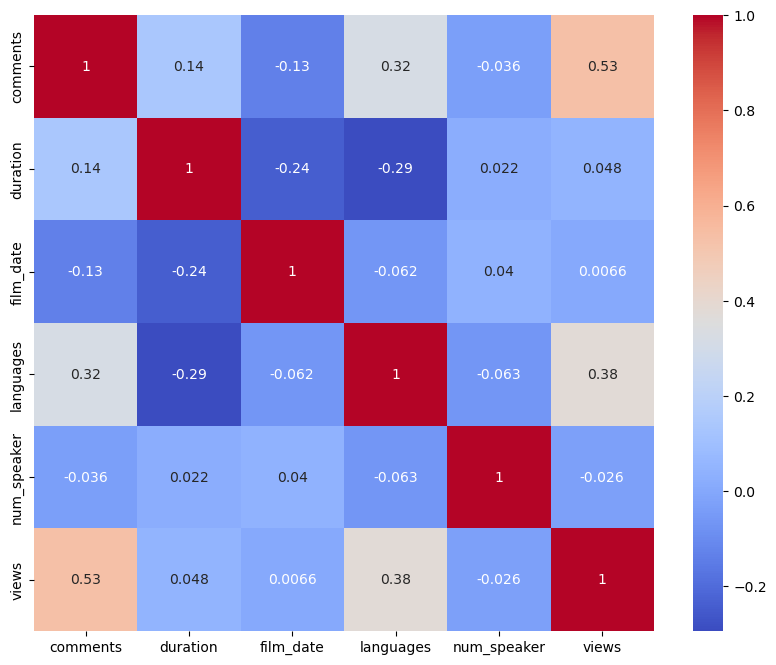

In [10]:
matrice = dataset.drop(columns=['ID']).corr(numeric_only=True)  # calcola la matrice di correlazione tra tutte le colonne numeriche del dataset
plt.figure(figsize=(10,8))
sns.heatmap(matrice, cmap="coolwarm",annot=True)
plt.show()

In [11]:
col_corr = set()

for i in range(len(matrice.columns)):
    for j in range(i):
        # Usiamo abs() per catturare sia correlazioni positive che negative
        if abs(matrice.iloc[i, j]) > 0.5:
            colname = matrice.columns[i]
            col_corr.add(colname)

print("Colonne da considerare correlate:", col_corr)

Colonne da considerare correlate: {'views'}


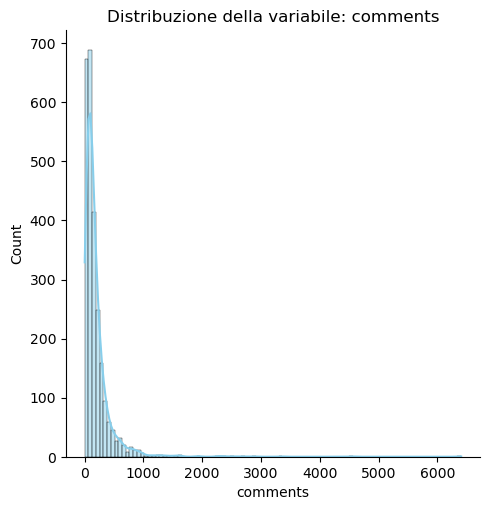

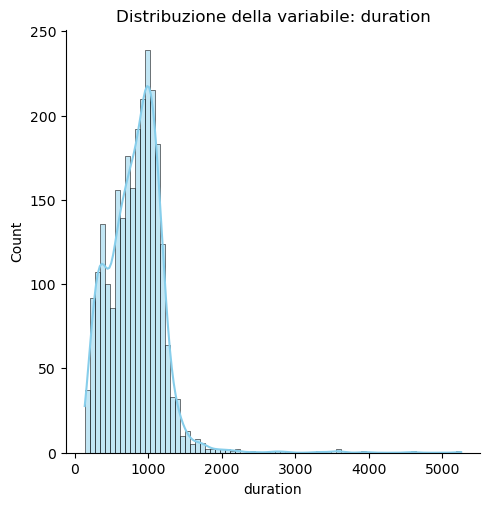

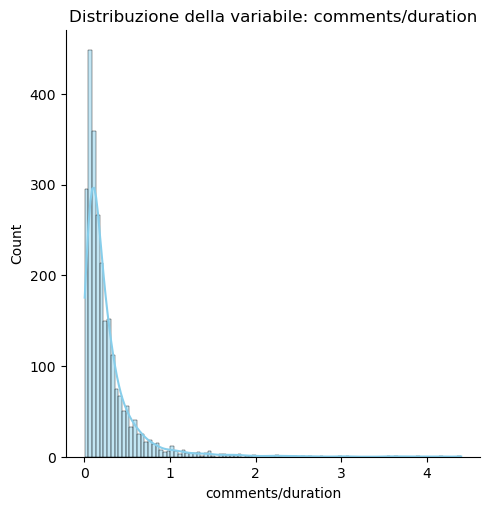

In [12]:
#Aggiungere una variabile ai dati che contenga il rapporto tra commenti di un presentazione e la durata della presentazione. Plottare la distribuzione di commenti, durata, e il loro rapporto, in tre plot separati. Personalizzate i grafici come ritenete opportuno al fine di migliorarne la leggibilità.


dataset['comments/duration']=dataset['comments']/dataset['duration']

variabili_plot= ('comments','duration','comments/duration')

for i in variabili_plot:
    sns.displot(dataset[i], kde=True, color='skyblue')
    plt.title(f'Distribuzione della variabile: {i}')
    plt.show()


In [13]:
#Quale tipo di occupazione è più rappresentata tra gli speaker? Indicare cioè, il mestiere più frequente.

#usiamo value_counts per ottenere contare le frequenze dei valori della variabile e poi index[0] per prendere il primo elemento più frequente visto che per default value_counts ordina gli elementi in ordine decrescente

print('Il lavoro più frequente è:',dataset['speaker_occupation'].value_counts().index[0])

Il lavoro più frequente è: Writer


In [14]:
#Per ogni anno, mostrare il numero totale di presentazioni ed il numero totale visualizzazioni. Quale anno ha avuto il maggior numero di visualizzazione per presentazione? Plottare questo rapporto al variare dell’anno.

# Crea una nuova colonna 'anno' estraendolo da 'published_date'
dataset['anno'] = dataset['published_date'].dt.year

dataset_presentazioni_anni= dataset.groupby('anno').agg({
    'views': ['count', 'sum'],    # Numero di presentazioni e media visualizzazioni
})
dataset_presentazioni_anni.columns = ['Numero_presentazioni', 'Somma_Views']
dataset_presentazioni_anni['Somma_Views/Numero_presentazioni']=(dataset_presentazioni_anni['Somma_Views']/dataset_presentazioni_anni['Numero_presentazioni']).round(2)
dataset_presentazioni_anni['Somma_Views'] = dataset_presentazioni_anni['Somma_Views'].map('{:,}'.format)
dataset_presentazioni_anni.head(10)


,Numero_presentazioni,Somma_Views,Somma_Views/Numero_presentazioni
anno,,,
2006,50,"206,548,331",4130966.62
2007,122,"176,455,861",1446359.52
2008,188,"260,270,993",1384420.18
2009,222,"342,059,615",1540809.08
2010,257,"402,694,421",1566904.36
2011,261,"400,499,694",1534481.59
2012,303,"487,028,631",1607355.22
2013,244,"545,291,823",2234802.55
2014,239,"444,231,444",1858708.97


In [15]:
anno_con_max_visualizzazioni = dataset_presentazioni_anni['Somma_Views/Numero_presentazioni'].idxmax()
print("L'anno con maggiori visualizzazioni per presentazioni è:",anno_con_max_visualizzazioni)

L'anno con maggiori visualizzazioni per presentazioni è: 2006


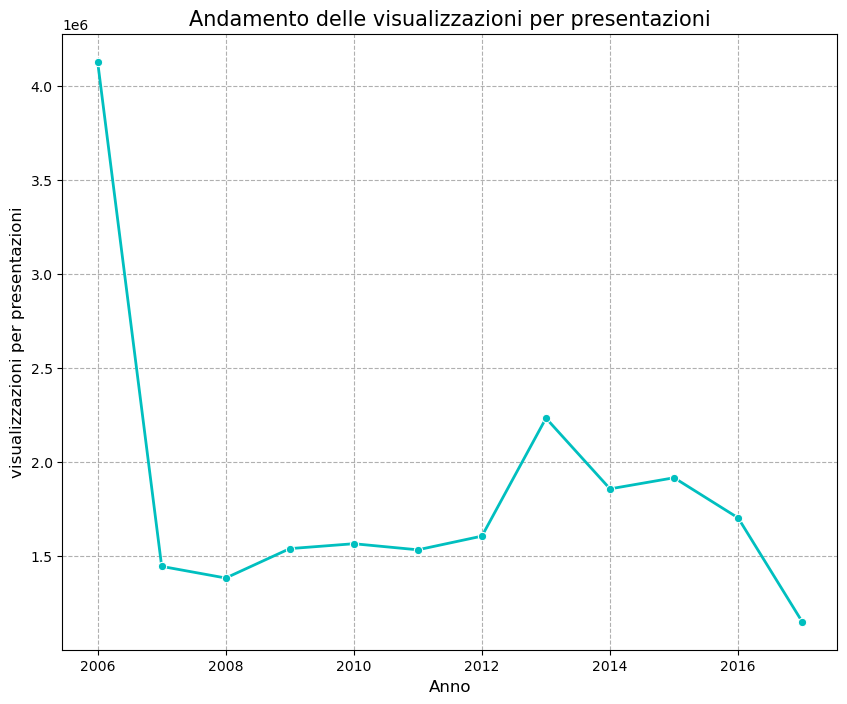

In [16]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=dataset_presentazioni_anni, x='anno', y='Somma_Views/Numero_presentazioni', marker='o', color='c', linewidth=2)


plt.title('Andamento delle visualizzazioni per presentazioni', fontsize=15)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('visualizzazioni per presentazioni', fontsize=12)
plt.grid(True, linestyle='--') 

plt.show()

In [17]:
#La variabile ‘ratings’ è particolare: il suo contenuto è un dizionario, che mostra, per ogni presentazione, i sentimenti espressi dagli spettatori. Perciò, ogni chiave del dizionario rappresenta il tipo di reazione (‘Funny’, ‘Courageous’ etc.) e il valore corrispondente rappresenta quante persone hanno espresso quell’emozione. Aprirte tale variabile, con una opportuna funzione o comando, mostrando per ogni presentazione tutti i sentimenti e i rispettivi valori presenti nei rating. Attenzione: non tutte le presentazione avranno tutti i tipi possibili di sentimento nei propri ‘rating’. Se un sentimento non è presente per una certa presentazione, aggiungerlo al dizionario con valore 0.

#creiamo la lista dei sentimenti (unici)
lista_sentimenti = []
# Usiamo .itertuples() o accediamo direttamente alla colonna per velocità
for ratings_list in dataset['ratings']:
    ratings_list = ast.literal_eval(ratings_list)  # converte la stringa in lista di dizionari
    for r in ratings_list:
        lista_sentimenti.append(r['name'])

#creiamo una lista per contenere i nuovi dizionari piatti
tutti_voti_flat = []

for ratings_list in dataset['ratings']:
    ratings_list = ast.literal_eval(ratings_list)
    # Creiamo il dizionario per la riga corrente
    voti_presenti = {r['name']: r['count'] for r in ratings_list}
    
    # Integriamo i sentimenti mancanti con valore 0
    for s in lista_sentimenti:
        if s not in voti_presenti:
            voti_presenti[s] = 0
    
    tutti_voti_flat.append(voti_presenti)

#aggiungiamo la lista come nuova colonna del DataFrame
dataset['ratings_flat'] = tutti_voti_flat

presentazione_casuale='Do schools kill creativity?'
indice_presentazione_casuale = np.where(dataset['title'] == presentazione_casuale)[0]
#verifica
dataset['ratings_flat'].iloc[indice_presentazione_casuale]


0    {'Funny': 19645, 'Beautiful': 4573, 'Ingenious': 6073, 'Courageous': 3253, 'Longwinded': 387, 'Confusing': 242, 'Informative': 7346, 'Fascinating': 10581, 'Unconvincing': 300, 'Persuasive': 10704, 'Jaw-dropping': 4439, 'OK': 1174, 'Obnoxious': 209, 'Inspiring': 24924}
Name: ratings_flat, dtype: object

In [18]:
#Creare un nuovo dataframe separato. In tale dataframe inserire l’identificativo numerico di ogni presentazione. In querto nuovo dataframe inserire, come variabili i sentimenti espressi nei rating corrispondenti. Tali variabili avranno come valori il numero espresso nella variabile ‘rating’ originale. Usate l’identificativo per associare correttamente. Una volta terminato, mostrare tutte le informazioni statistiche di base per questo nuovo dataframe.

#creaimo il dataset con l'indice
dataset_new=dataset['ID']

#creiamo il dataset con i sentimenti con la funzione series che serve per creare una colonna per ogni chiave dei dizionari
dataset_reazioni = dataset['ratings_flat'].apply(pd.Series)


dataset_new = pd.concat([dataset_new, dataset_reazioni], axis=1)

dataset_new


,ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2545,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,2546,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,2547,1,14,19,2,0,5,32,24,1,3,1,4,0,30
2548,2548,63,21,37,107,3,1,75,39,6,65,7,5,7,147


In [19]:
#mostriamo tutte le informazioni statistiche di base per questo nuovo dataframe

dataset_new.describe()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
count,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000
mean,154.784198,192.450472,150.794025,164.701651,32.730346,20.981918,348.054245,314.424135,52.833726,220.185535,147.966981,81.303852,26.027123,530.827044
std,589.795546,477.885206,284.104180,434.188543,41.643115,31.583290,540.249183,625.191783,91.774066,467.149527,554.306195,90.405236,53.501865,1315.976729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,8.000000,26.000000,26.000000,20.000000,9.000000,5.000000,100.000000,79.000000,12.000000,37.000000,18.000000,32.000000,6.000000,113.000000
50%,21.000000,68.000000,69.000000,51.000000,19.000000,12.000000,213.000000,162.000000,27.000000,97.000000,42.000000,55.500000,13.000000,233.500000
75%,92.250000,190.250000,170.250000,149.000000,41.000000,24.000000,401.000000,344.000000,60.000000,226.250000,111.000000,99.000000,27.000000,498.250000
max,19645.000000,9437.000000,6073.000000,8668.000000,447.000000,531.000000,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000


In [20]:
#Infine unire il nuovo dataframe di rating all’originale con una operazione di join o merge.

dataset= pd.merge(dataset, dataset_new, on='ID',how='left')
dataset.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,113,62,443,132,258,268,116,203,131,413
2,124,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,...,53,32,380,132,36,460,230,85,35,1070
4,593,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [21]:
dataset.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'ID', 'comments/duration', 'anno', 'ratings_flat',
       'Funny', 'Beautiful', 'Ingenious', 'Courageous', 'Longwinded',
       'Confusing', 'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'],
      dtype='object')